## Download dataset and pre-processing dataset

In [1]:
!gdown 1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q

Downloading...
From: https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
To: /content/BTC-Daily.csv
100% 257k/257k [00:00<00:00, 16.1MB/s]


In [2]:
# Load dataset
import pandas as pd

df = pd.read_csv('BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()

### Analyst dataset

2014-11-28 to 2022-03-01


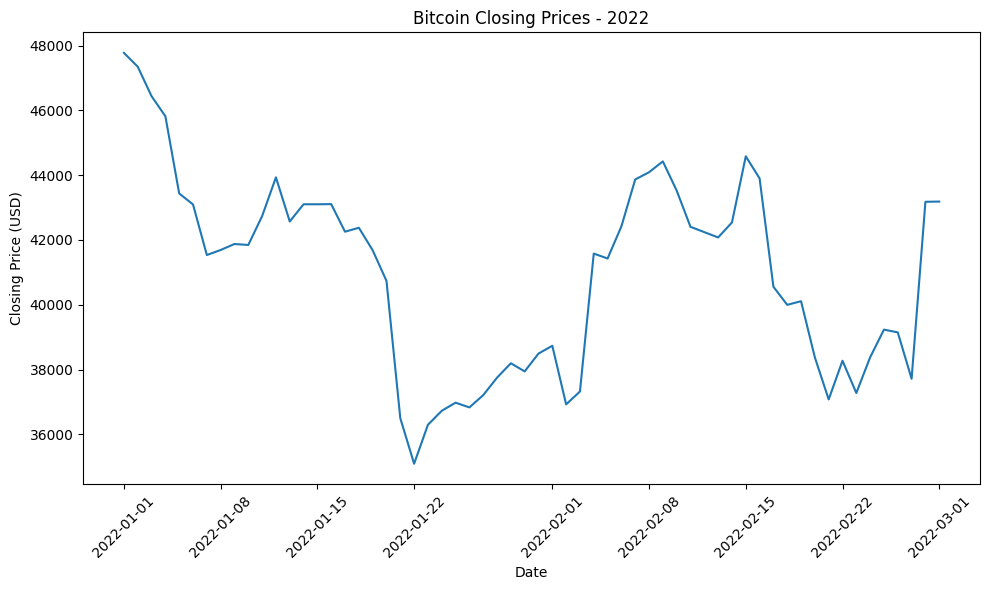

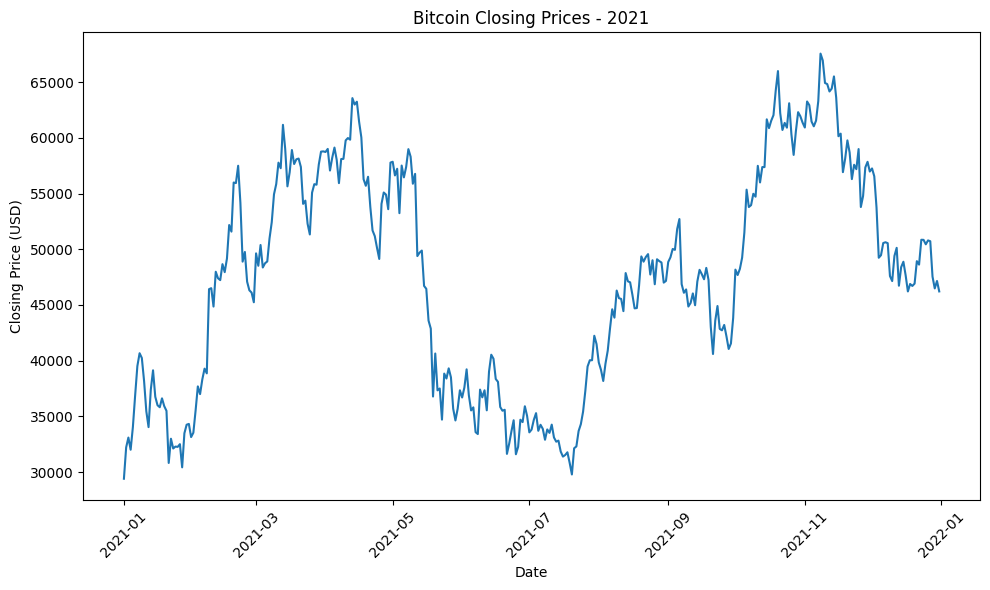

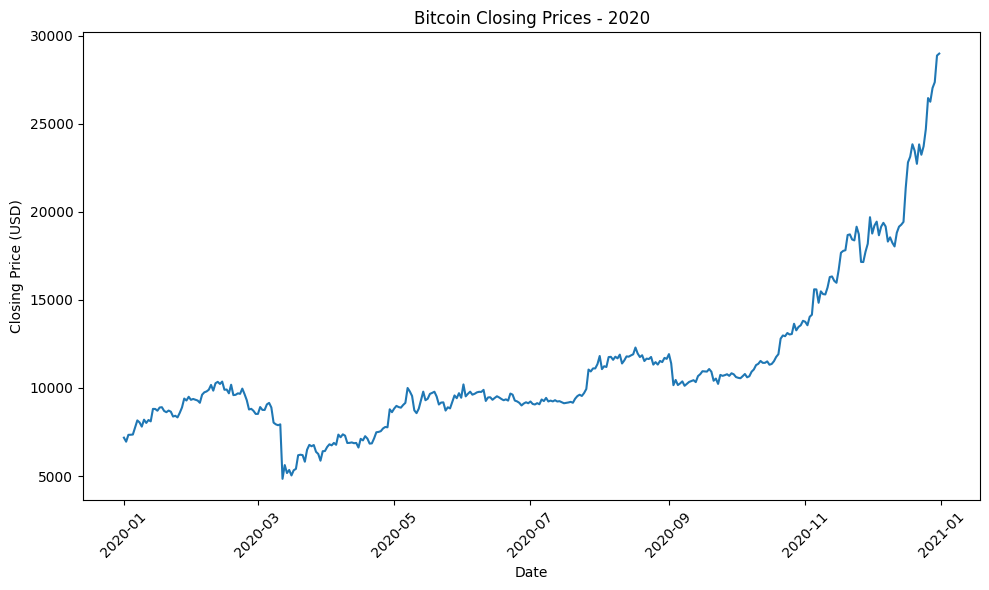

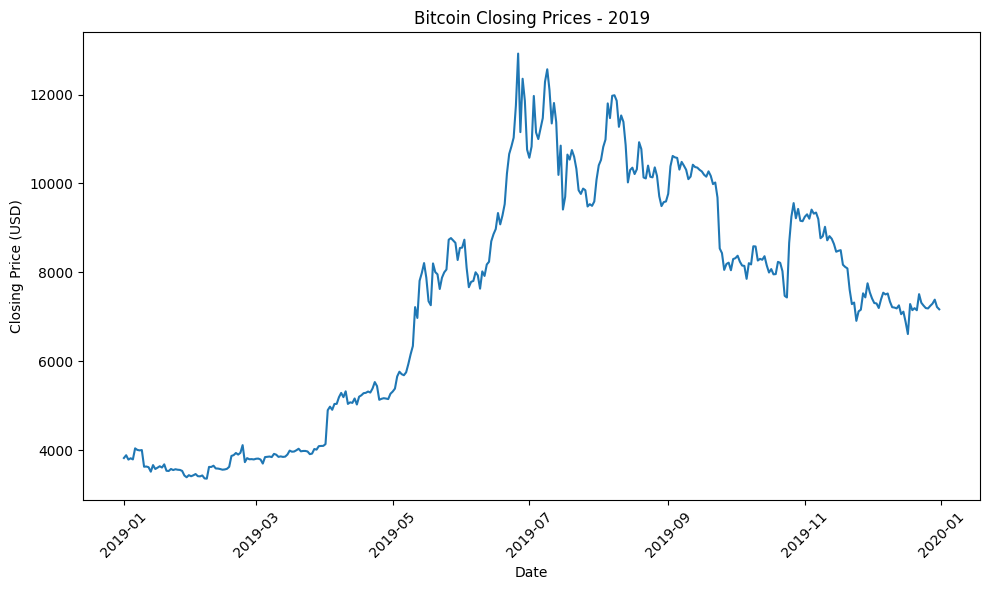

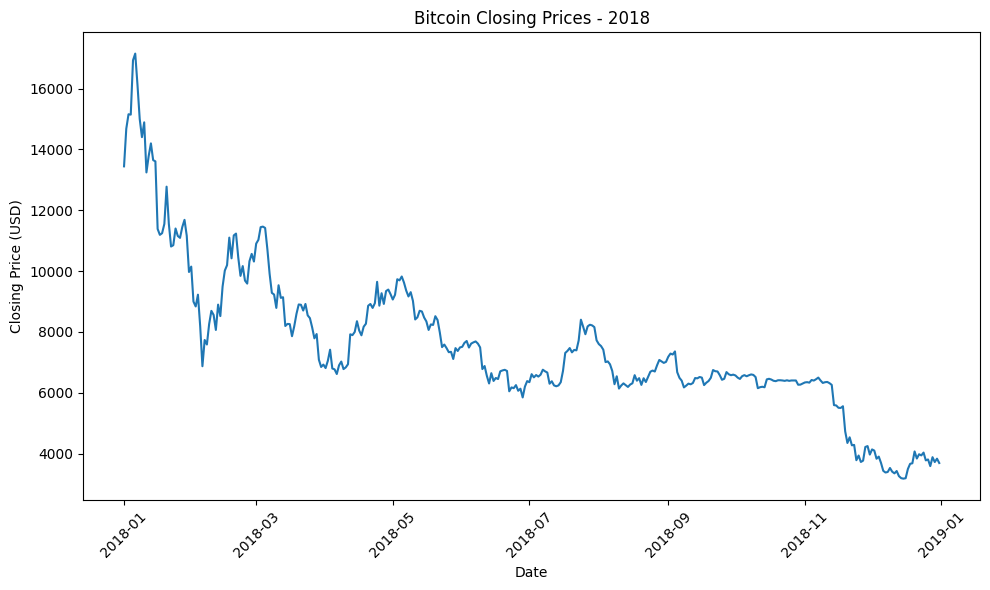

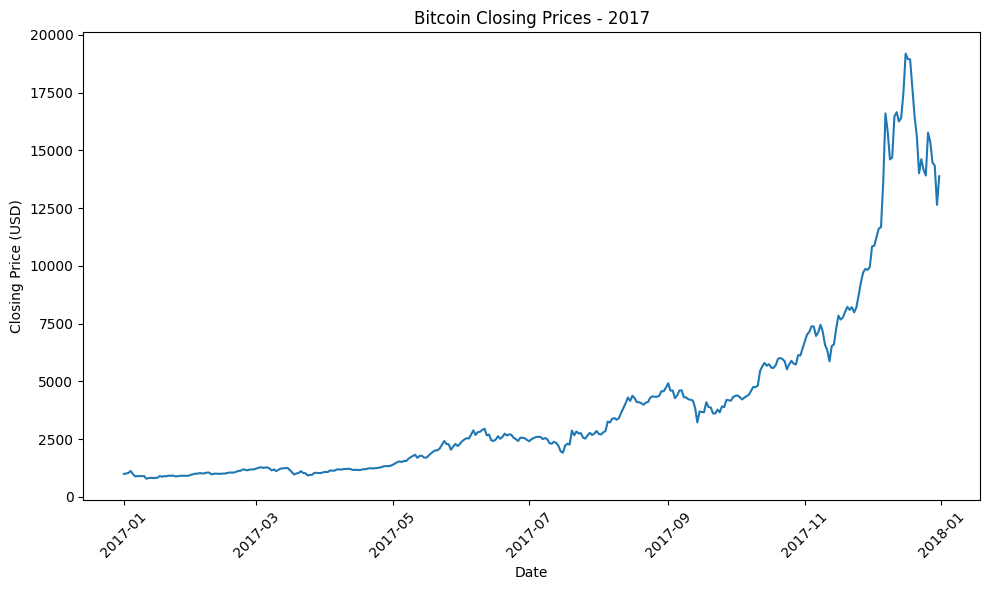

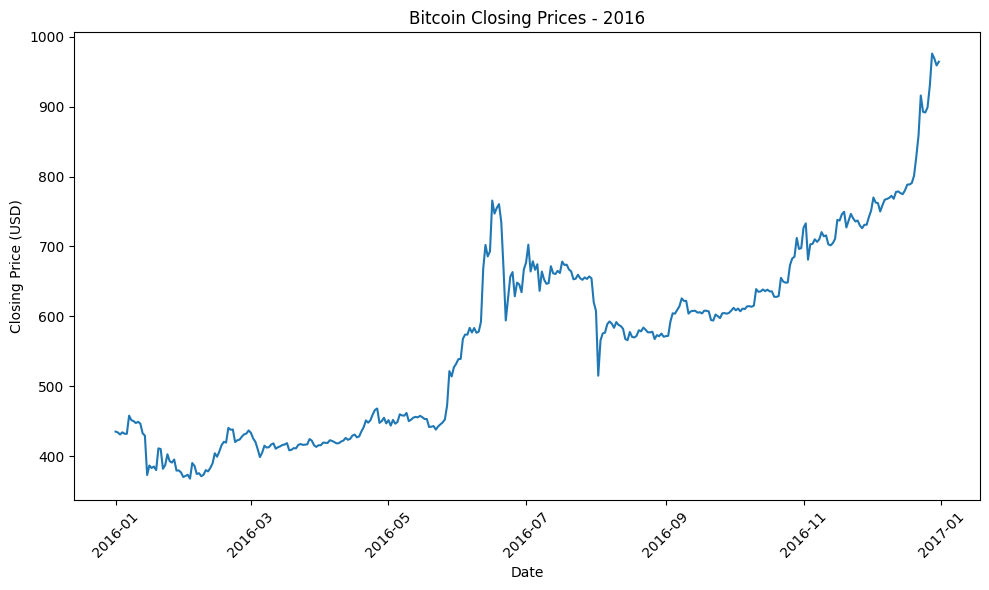

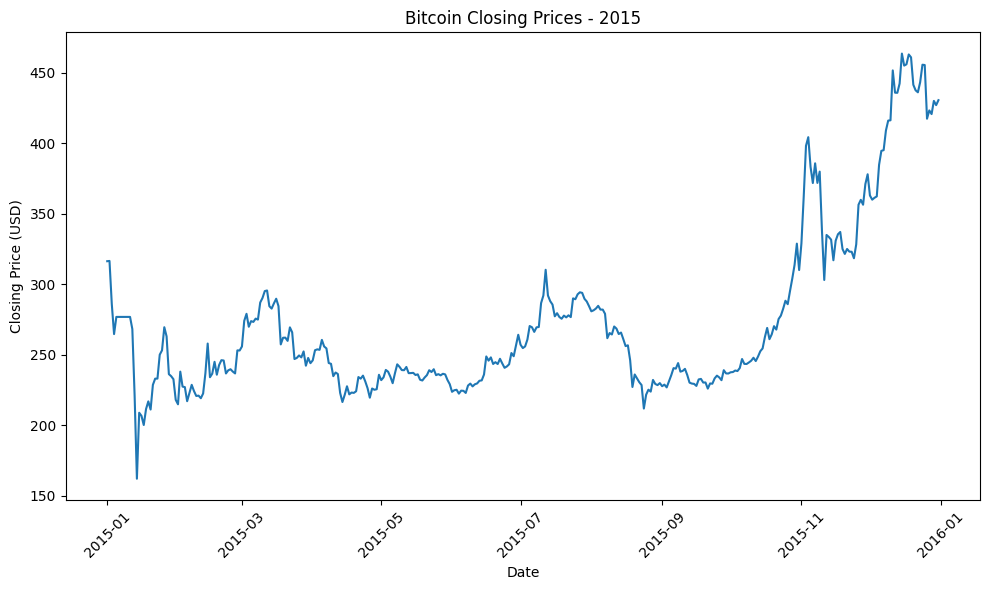

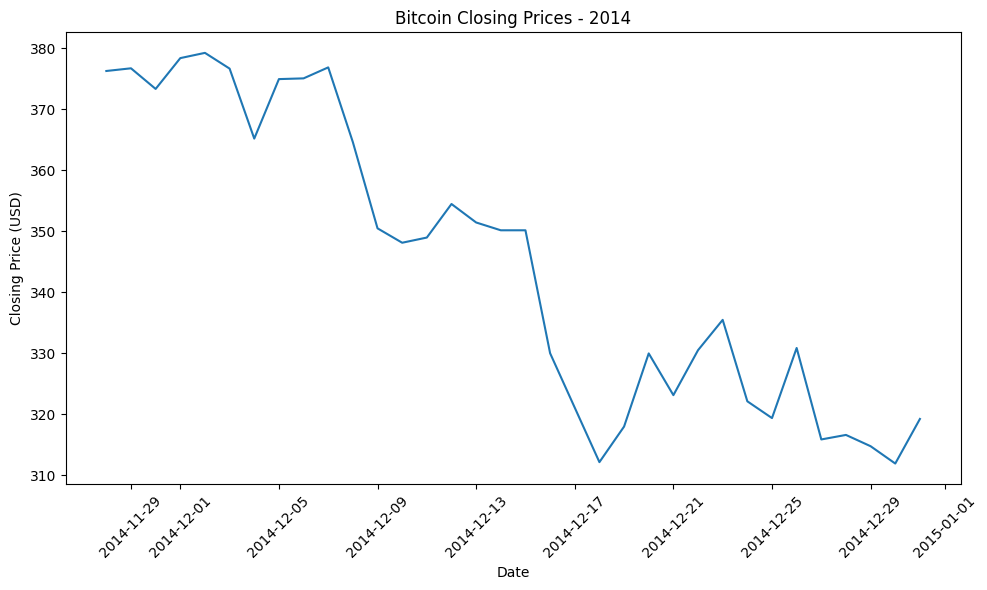

In [6]:
import matplotlib.pyplot as plt

# Range of dates covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
unique_years = df['year'].unique()


for year in unique_years:
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day


    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Candlestick chart

In [7]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.0 MB/s eta 0:00:00


<ipython-input-10-ea84f5eaac79>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


<function matplotlib.pyplot.show(close=None, block=None)>

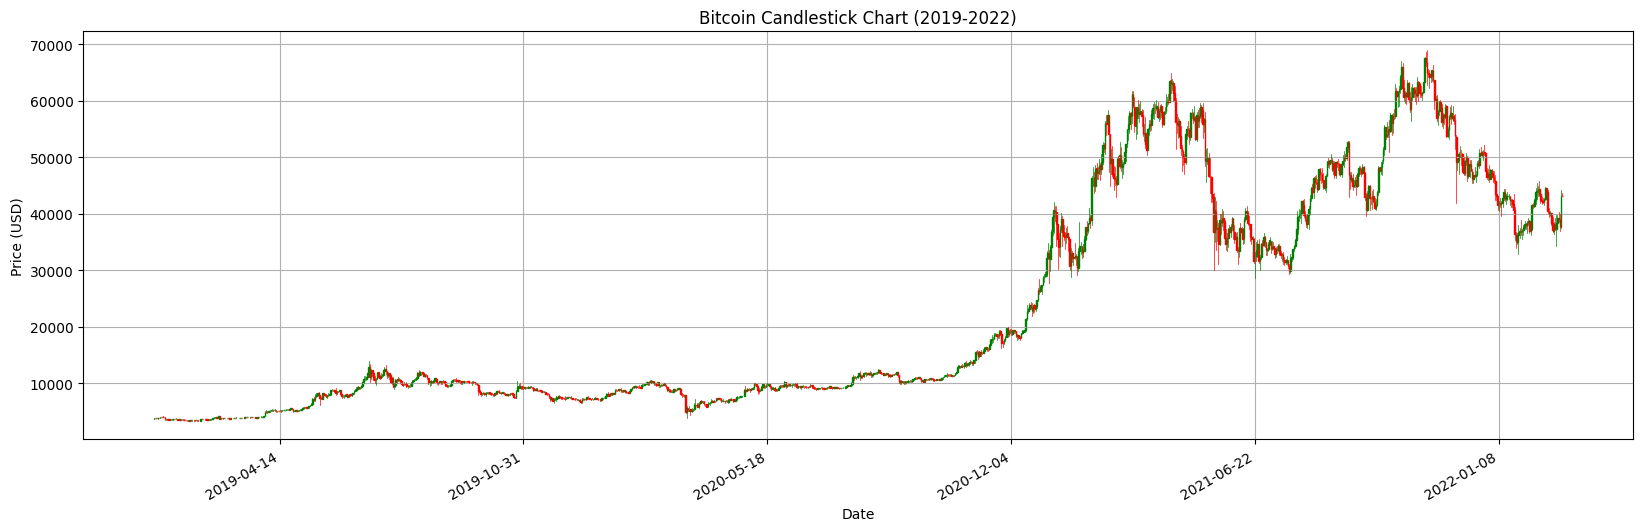

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.show

## Create Linear Regression model

In [11]:
def predict(X, w, b):
  return X.dot(w) + b

def gradient(y_hat, y, x):
  loss = y_hat - y
  dw = x.T.dot(loss) / len(y)
  db = np.sum(loss) / len(y)
  cost = (loss ** 2).sum() / (2 * len(y))

  return dw, db, cost

def update_weight(w, b, lr, dw, db):
  w_new = w - lr * dw
  b_new = b - lr * db

  return w_new, b_new

## Normalization dataset and split train, test

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

scalar = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## Train Linear Regression model

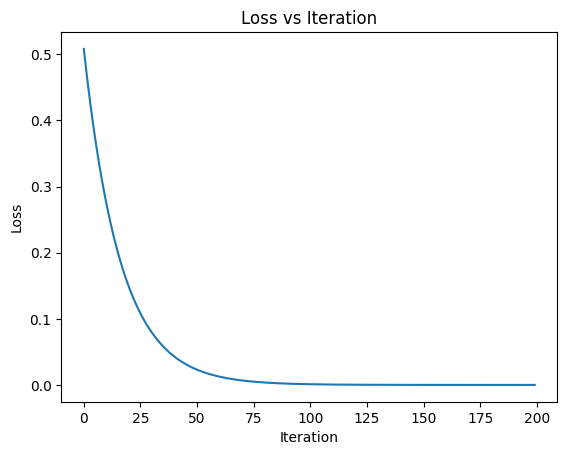

In [21]:
import numpy as np

def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
  n_samples, n_features = X.shape
  w = np.zeros(n_features) # Initialize weights
  b = 0 # Initialize bias
  losses = []

  for _ in range(num_iterations):
    y_hat = predict(X, w, b)
    dw, db, cost = gradient(y_hat, y, X)
    w, b = update_weight(w, b, learning_rate, dw, db)
    losses.append(cost)

  return w, b, losses

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, learning_rate=0.01, num_iterations=200)

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.show()

## Evaluate Linear Regression model

In [23]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R- squared):", round(train_accuracy, 4))
print("Testing Accuracy (R- squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R- squared): 0.9989
Testing Accuracy (R- squared): 0.9991


## Using on price from 01/01/2019 - 01/04/2019

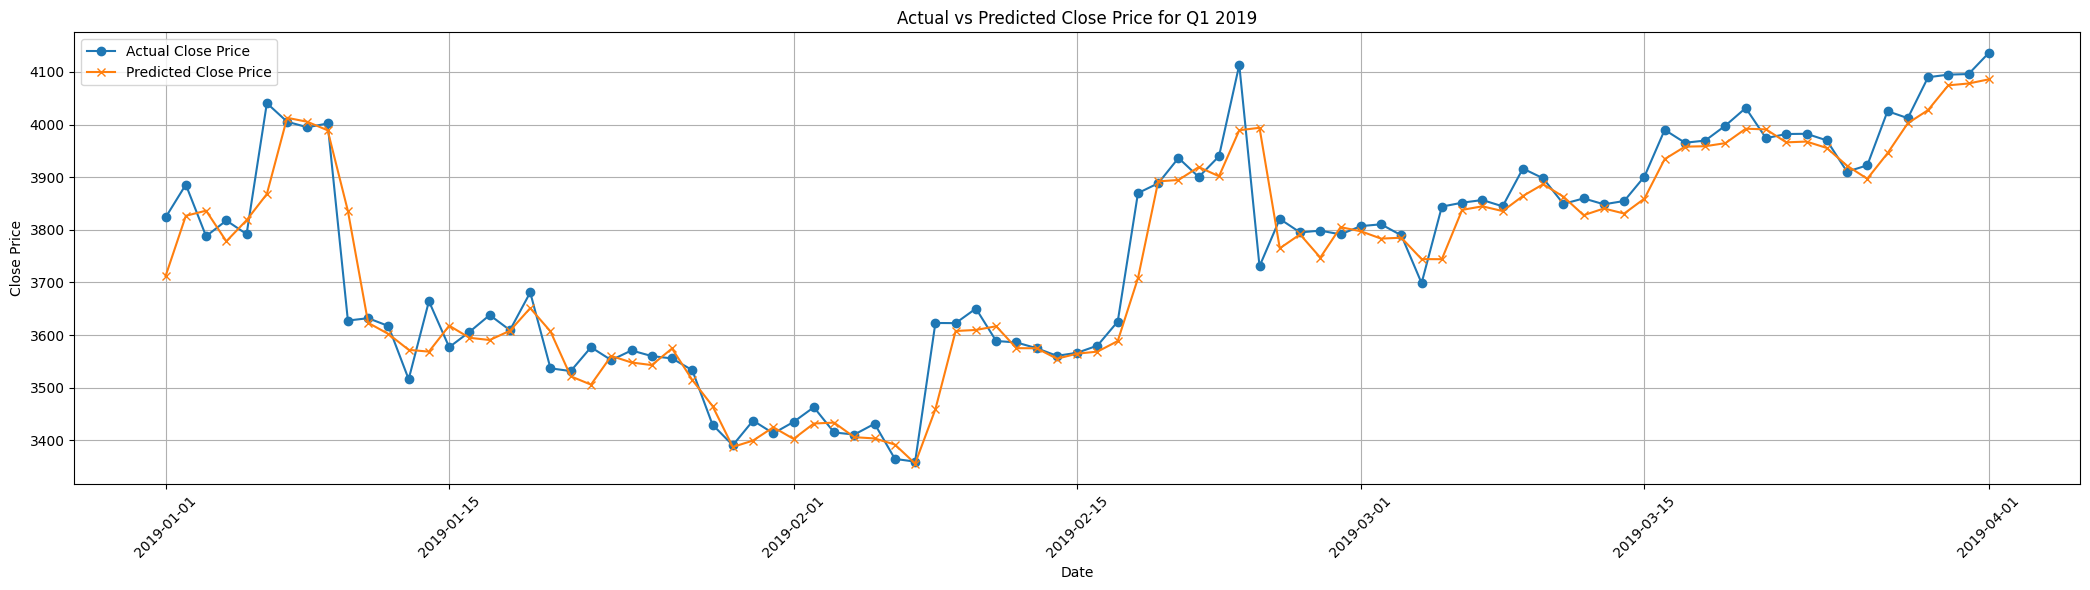

In [25]:
# Filter data for 2019-01-01 to 2019-04-01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[['open', 'high', 'low']]
y_2019_q1_actual = df_2019_q1['close']

y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(21, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs Predicted Close Price for Q1 2019')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()